<a href="https://colab.research.google.com/github/ttogle918/ds-section4-sprint2/blob/master/N423_lanugage_modeling_with_rnn/N423a_Language_Modeling_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / Assignment 3*

--- 

# Language Modeling with RNN



## Code

다음 링크는 LSTM을 사용하여 Spam 메시지 분류를 수행한 캐글 노트북입니다. => [Link](https://www.kaggle.com/kredy10/simple-lstm-for-text-classification) <br/>

위 노트북에서 사용한 코드를 참고하여<br/>
캐글 데이터셋인 [Women's E-Commerce Clothing Reviews](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews) 를 분류해 보세요.

- 분류에 사용될 텍스트 데이터 : **`Review Text`** 열을 사용합니다.
- 레이블(label) 데이터 : **`Recommended IND`** 열을 사용합니다.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
from google.colab import files

file = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews (1).csv


### 1) 데이터 전처리
    
- 데이터셋을 데이터프레임으로 읽어옵니다.
- 필요없는 열(column)을 삭제합니다.

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
column = 'Review Text'
label = 'Recommended IND'

In [5]:
import io
df = pd.read_csv(io.StringIO(file['Womens Clothing E-Commerce Reviews.csv'].decode('utf-8')))
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
# 'Review Text', 'Recommended IND'만 남기기
df = df.loc[: ,[column, label]]

In [7]:
# 중복값, na값 제거
print(df.shape)
df = df.drop_duplicates()
print(df.shape)
df = df.dropna()
print(df.shape)

(23486, 2)
(22636, 2)
(22634, 2)


### 2) 텍스트 분류를 수행해주세요.

- 데이터셋 split시 test_size의 비율은 20%로, `random_state = 42` 로 설정합니다. 
- Tokenizer의 `num_words=3000` 으로 설정합니다.
- pad_sequence의 `maxlen=400` 으로 설정합니다.
- 학습 시, 파라미터는 `batch_size=128, epochs=10, validation_split=0.2` 로 설정합니다.
- EarlyStopping을 적용합니다. 파라미터는 `monitor='val_loss',min_delta=0.0001, patience=3` 로 설정합니다.
- evaluate 했을 때의 loss와 accuarcy를 [loss, acc] 형태로 입력해주세요. Ex) [0.4321, 0.8765]

In [8]:
# 데이터셋 split
X_train, X_test, y_train, y_test = train_test_split(df[column], df[label], test_size=0.2, random_state=42)

In [9]:
# Tokenizer
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_train)

In [10]:
# text to sequence
X_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)


In [11]:
maxlen=400
max_features = 20000

print('Pad Sequences (samples x maxlen)')
X_encoded= sequence.pad_sequences(X_encoded, maxlen=maxlen)
X_test_encoded = sequence.pad_sequences(X_test_encoded, maxlen=maxlen)
print('X_train shape: ', X_encoded.shape)
print('X_test shape: ', X_test_encoded.shape)

Pad Sequences (samples x maxlen)
X_train shape:  (18107, 400)
X_test shape:  (4527, 400)


In [12]:
X_encoded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3)

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(max_features, 128), # Embedding Layer를 거친 후의 shape : (batch_size, maxlen, embedding_size=128)
  tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2), # LSTM Layer를 거친 후의 shape : (batch_size, 1, hidden_size=128)
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [14]:
batch_size=128
epochs=10
validation_split=0.2

unicorns = model.fit(X_encoded, y_train,
          batch_size=batch_size, 
          epochs=3, 
          validation_data=(X_test_encoded, y_test), callbacks=[callback])

Epoch 1/3
142/142 [==============================] - 417s 3s/step - loss: 0.3550 - accuracy: 0.8502 - val_loss: 0.2717 - val_accuracy: 0.8818
Epoch 2/3
142/142 [==============================] - 407s 3s/step - loss: 0.2257 - accuracy: 0.9021 - val_loss: 0.2517 - val_accuracy: 0.8884
Epoch 3/3
142/142 [==============================] - 403s 3s/step - loss: 0.1962 - accuracy: 0.9190 - val_loss: 0.2500 - val_accuracy: 0.8873


In [16]:
model.evaluate(X_test_encoded, y_test)

142/142 [==============================] - 24s 170ms/step - loss: 0.2500 - accuracy: 0.8873


[0.25001269578933716, 0.887342631816864]

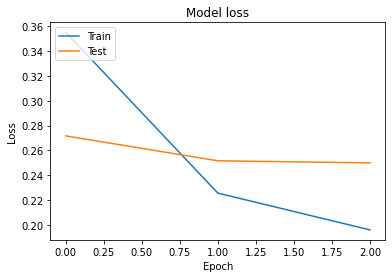

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(unicorns.history['loss'])
plt.plot(unicorns.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();